In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv


--2020-07-23 13:44:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.128, 173.194.197.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.04s   

2020-07-23 13:44:40 (127 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [2]:
import csv

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

labels = []
sentences = []
with open('/tmp/bbc-text.csv', 'r') as file:
  reader = csv.reader(file, delimiter=',')
  next(reader)
  for row in reader:
    labels.append(row[0])
    sentence = []
    for word in row[1].split():
      if word not in stopwords:
        sentence.append(word)
    sentence = ' '.join(sentence)
    sentences.append(sentence)

In [3]:
train_size = 0.8
train_size = int(len(sentences) * train_size)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

In [4]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [5]:
import numpy as np

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [6]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_epochs = 30

history = model.fit(train_padded, training_label, epochs=num_epochs, validation_data=(validation_padded, validation_label))

Epoch 1/30
56/56 [==============================] - 1s 10ms/step - loss: 1.7740 - accuracy: 0.3579 - val_loss: 1.7476 - val_accuracy: 0.4112
Epoch 2/30
56/56 [==============================] - 0s 7ms/step - loss: 1.7007 - accuracy: 0.3848 - val_loss: 1.6422 - val_accuracy: 0.3955
Epoch 3/30
56/56 [==============================] - 0s 6ms/step - loss: 1.5416 - accuracy: 0.5011 - val_loss: 1.4438 - val_accuracy: 0.5798
Epoch 4/30
56/56 [==============================] - 0s 7ms/step - loss: 1.3089 - accuracy: 0.5966 - val_loss: 1.2194 - val_accuracy: 0.7034
Epoch 5/30
56/56 [==============================] - 0s 7ms/step - loss: 1.0796 - accuracy: 0.7416 - val_loss: 1.0185 - val_accuracy: 0.7258
Epoch 6/30
56/56 [==============================] - 0s 6ms/step - loss: 0.8887 - accuracy: 0.7736 - val_loss: 0.8652 - val_accuracy: 0.7596
Epoch 7/30
56/56 [==============================] - 0s 7ms/step - loss: 0.7369 - accuracy: 0.8140 - val_loss: 0.7427 - val_accuracy: 0.7978
Epoch 8/30
56/56 [=

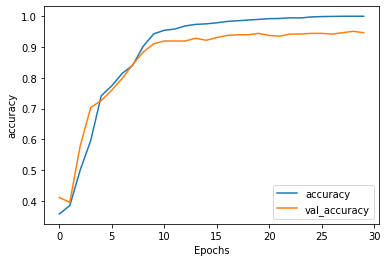

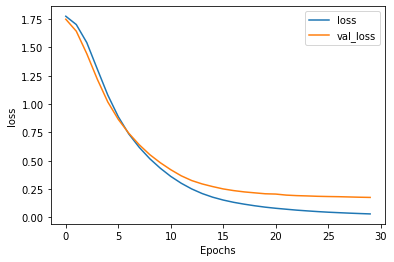

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [9]:
e = model.layers[0]
weights = e.get_weights()[0]
weights.shape

(1000, 16)

In [10]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
  word = tokenizer.index_word[word_num]
  embeddings = weights[word_num]
  
  out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
  out_m.write(word + '\n')

out_v.close()
out_m.close()

In [ ]:
from google.colab import files
files.download('vecs.tsv')
files.download('meta.tsv')

# upload @ http://projector.tensorflow.org/

In [18]:
label_tokenizer.word_index

{'business': 2, 'entertainment': 5, 'politics': 3, 'sport': 1, 'tech': 4}